In [12]:
import mysql.connector

In [13]:
connection = mysql.connector.connect(
    user='root',
    password='sanskruti@2286',
    host='localhost',
    database='project'
)

In [14]:
cursor = connection.cursor()

In [15]:
import pandas as pd

In [16]:
cursor.execute('SELECT * FROM enhanced_large_sales_data LIMIT 10')  # Fetch a limited number of rows for testing

# Fetch the results
results = cursor.fetchall()

# Check if results are empty
if len(results) == 0:
    print("No data found in the table.")
else:
    # Create DataFrame with correct column names
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(results, columns=columns)

    # Display the DataFrame to check if data is present
    print(df)

# Close the cursor and connection
cursor.close()
connection.close()

         Date     Name     Product     Category Region  Quantity Sold  \
0  04-11-2025    Alice  Smartwatch  Peripherals   West              1   
1  24-01-2025    Diana  Smartphone      Gadgets   East             50   
2  08-05-2025      Bob  Smartphone  Peripherals  South             42   
3  05-04-2025   Edward  Headphones      Gadgets  North             12   
4  04-12-2025    Julia    Keyboard      Gadgets  North             36   
5  24-11-2025    Julia    Keyboard  Accessories  North             19   
6  03-09-2025      Ian      Tablet      Gadgets  South              4   
7  14-10-2025  Charlie  Smartwatch  Accessories   East             24   
8  01-01-2025    Fiona      Camera  Peripherals  North             10   
9  07-02-2025    Alice    Keyboard      Gadgets   East              5   

   Revenue  Discount (%) Payment Method Customer Feedback Order Status  
0      247            16         Online              Good     Returned  
1     3165            23           Cash         Ex

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
print(df.head())

         Date    Name     Product     Category Region  Quantity Sold  Revenue  \
0  04-11-2025   Alice  Smartwatch  Peripherals   West              1      247   
1  24-01-2025   Diana  Smartphone      Gadgets   East             50     3165   
2  08-05-2025     Bob  Smartphone  Peripherals  South             42     1656   
3  05-04-2025  Edward  Headphones      Gadgets  North             12     4556   
4  04-12-2025   Julia    Keyboard      Gadgets  North             36     2533   

   Discount (%) Payment Method Customer Feedback Order Status  
0            16         Online              Good     Returned  
1            23           Cash         Excellent    Cancelled  
2            18     Debit Card           Average    Cancelled  
3            28     Debit Card              Good    Cancelled  
4            30     Debit Card           Average     Returned  


In [19]:
# Set the style for seaborn
sns.set(style='whitegrid')

C:\Users\Admin\AppData\Local\Temp\ipykernel_20176\2251870257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


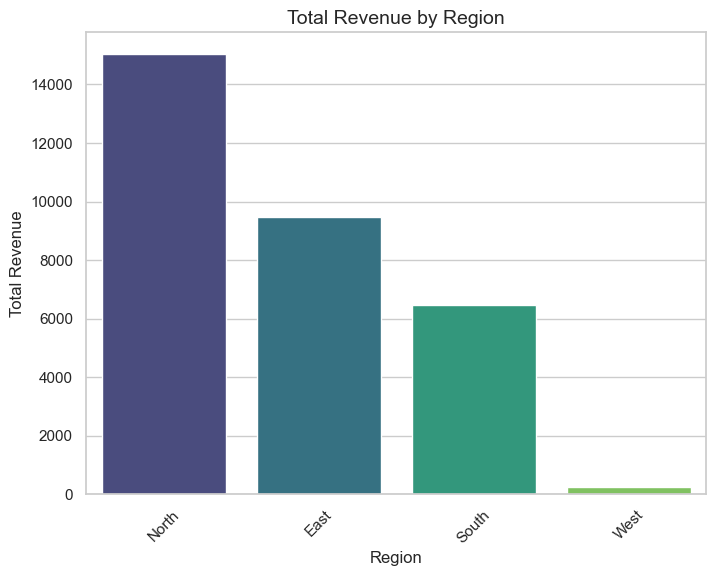

In [20]:
# Visualization 1: Total Revenue by Region
plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title("Total Revenue by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

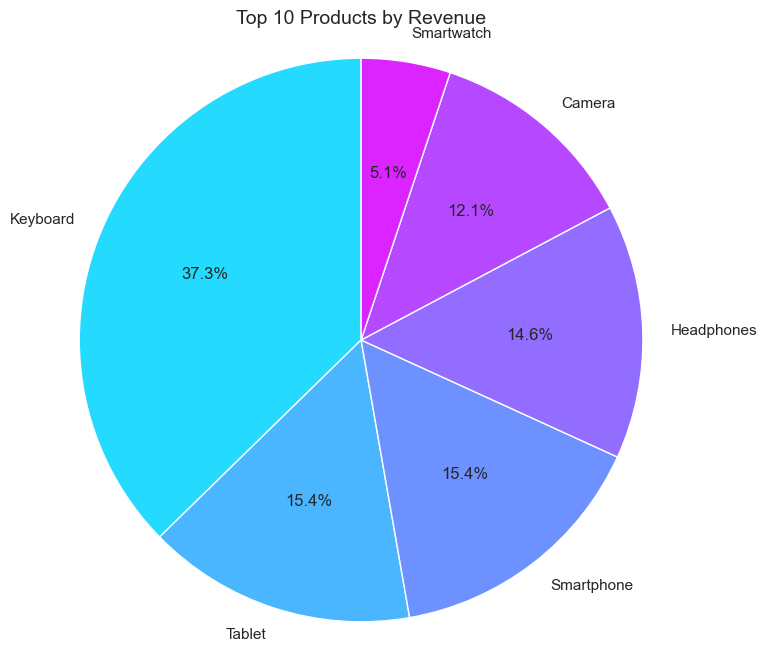

In [22]:

# Visualization 6: Total Revenue by Product (Pie Chart)
plt.figure(figsize=(8, 8))
product_sales = df.groupby('Product')['Revenue'].sum().nlargest(10)
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('cool', len(product_sales)))
plt.title("Top 10 Products by Revenue", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


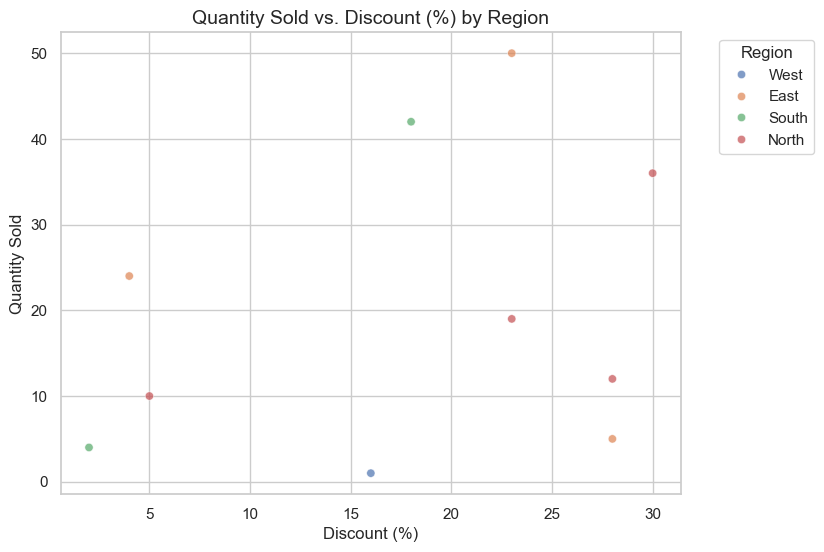

In [30]:
# Visualization 3: Quantity Sold vs. Discount (%) by Region
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount (%)', y='Quantity Sold', hue='Region', alpha=0.7)
plt.title("Quantity Sold vs. Discount (%) by Region", fontsize=14)
plt.xlabel("Discount (%)", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16796\1695698423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_revenue.index, y=order_status_revenue.values, palette='plasma')


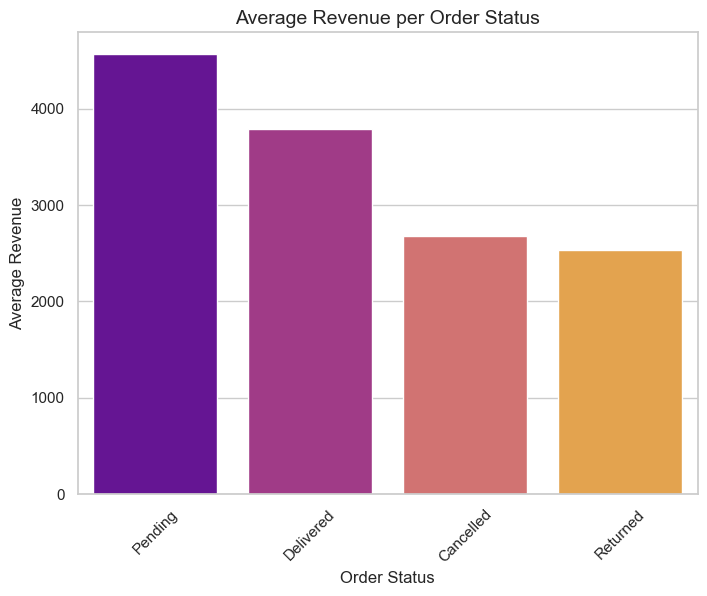

In [31]:
# Visualization 4: Average Revenue per Order Status
plt.figure(figsize=(8, 6))
order_status_revenue = df.groupby('Order Status')['Revenue'].mean().sort_values(ascending=False)
sns.barplot(x=order_status_revenue.index, y=order_status_revenue.values, palette='plasma')
plt.title("Average Revenue per Order Status", fontsize=14)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()


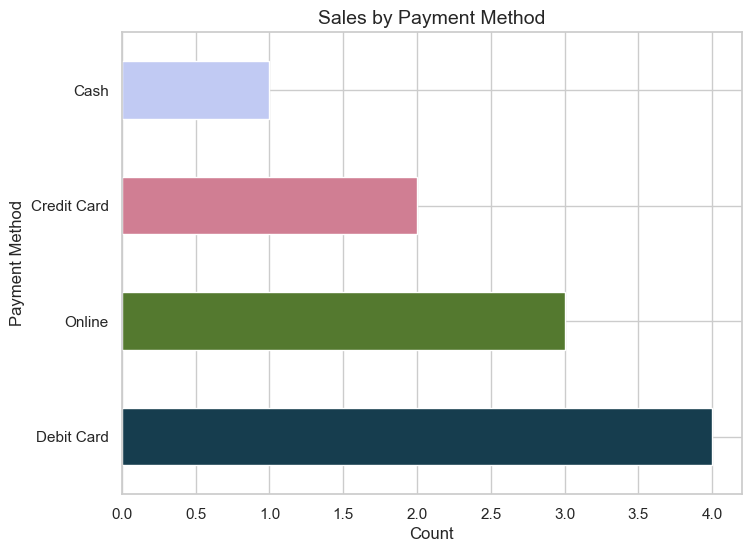

In [23]:
# Visualization 5: Sales by Payment Method (Horizontal Stacked Bar Chart)
payment_sales = df['Payment Method'].value_counts()
plt.figure(figsize=(8, 6))
payment_sales.plot(kind='barh', color=sns.color_palette('cubehelix', len(payment_sales)))
plt.title("Sales by Payment Method", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Payment Method", fontsize=12)
plt.show()


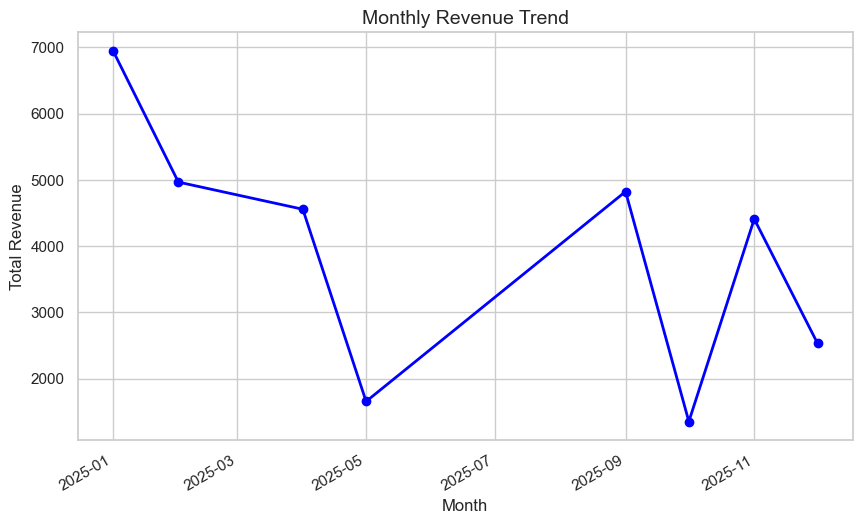

In [38]:
# Visualization 7: Monthly Revenue Trend
# Ensure correct date parsing by specifying dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Continue with monthly revenue trend visualization
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

plt.figure(figsize=(10, 6))
monthly_revenue.plot(color='blue', marker='o', linewidth=2)
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.show()


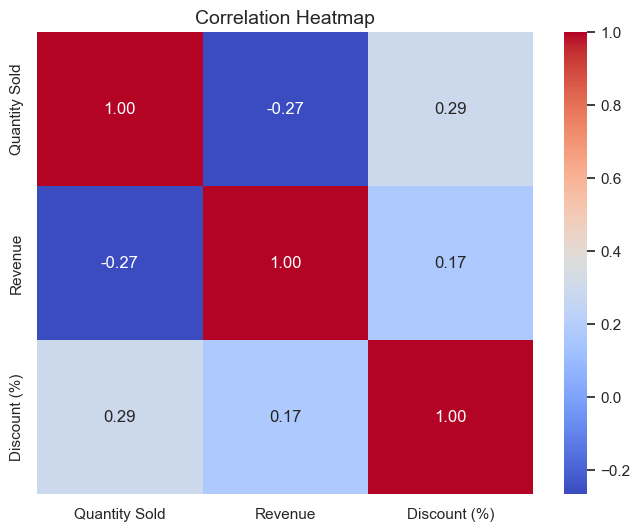

In [39]:
# Visualization 8: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

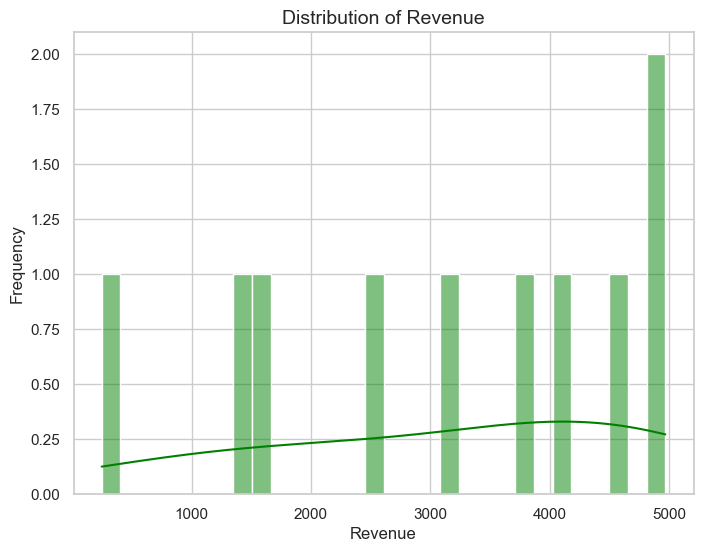

In [40]:
# Visualization 9: Distribution of Revenue
plt.figure(figsize=(8, 6))
sns.histplot(df['Revenue'], kde=True, color='green', bins=30)
plt.title("Distribution of Revenue", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16796\3026266152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_discount.index, y=category_discount.values, palette='viridis')


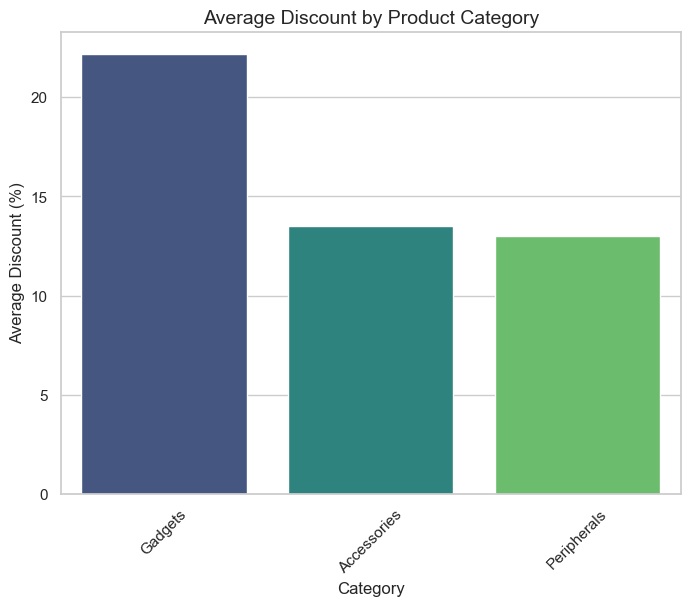

In [41]:
# Visualization 10: Average Discount by Product Category
plt.figure(figsize=(8, 6))
category_discount = df.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)
sns.barplot(x=category_discount.index, y=category_discount.values, palette='viridis')
plt.title("Average Discount by Product Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Discount (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16796\278298458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='Set2')


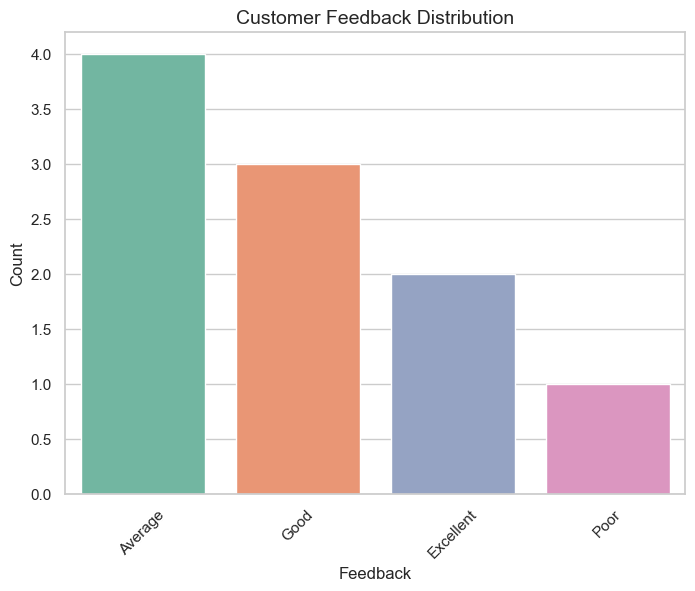

In [42]:
# Visualization 11: Customer Feedback Distribution
plt.figure(figsize=(8, 6))
feedback_counts = df['Customer Feedback'].value_counts()
sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='Set2')
plt.title("Customer Feedback Distribution", fontsize=14)
plt.xlabel("Feedback", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20176\806931189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Quantity Sold', data=df, palette='Blues')


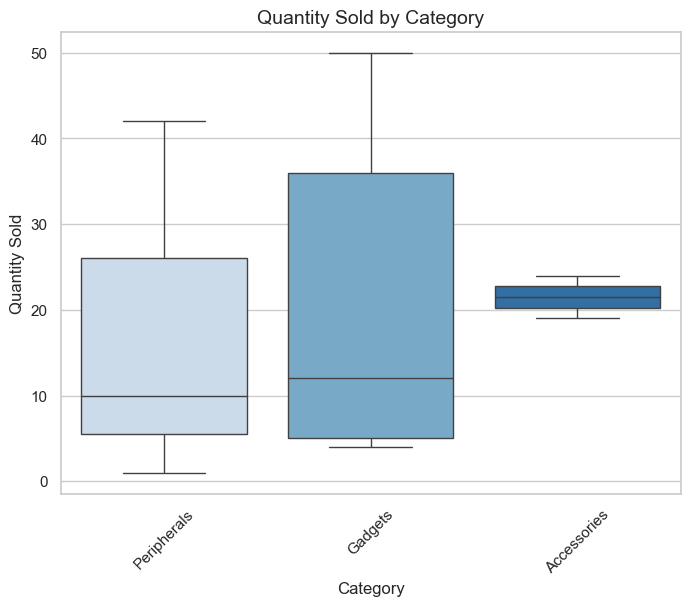

In [24]:
# Visualization 12: Quantity Sold by Category (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Quantity Sold', data=df, palette='Blues')
plt.title("Quantity Sold by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16796\736668256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='muted')


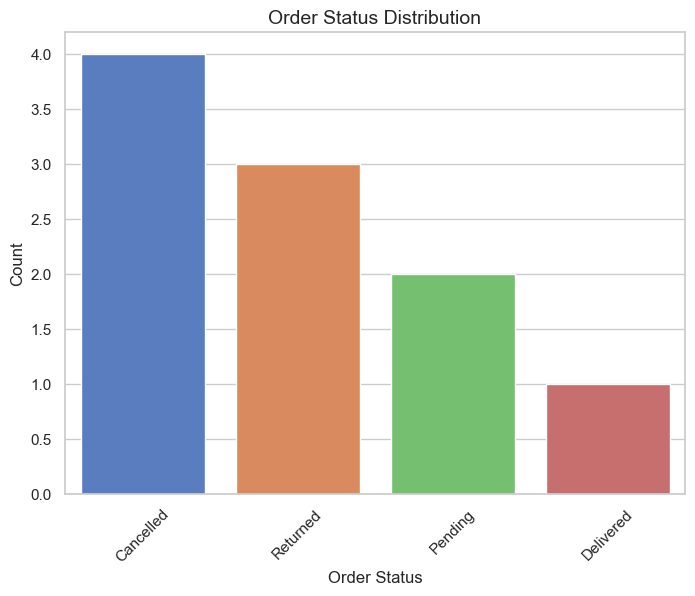

In [44]:
# Visualization 13: Order Status Distribution
plt.figure(figsize=(8, 6))
order_status_counts = df['Order Status'].value_counts()
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='muted')
plt.title("Order Status Distribution", fontsize=14)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
Conclusion=
This project gives a clear picture of how sales are performing and what drives revenue. 
We’ve identified which products and regions are doing the best, while also spotting areas that need improvement. 
Seasonal trends and discounts play a big role, and understanding customer preferences helps us see what’s working and what’s not.
Overall, this analysis helps us plan better, improve performance, and grow the business more effectively.


In [ ]:
Recommendation=
Promote Best Sellers: Market top products and bundle them with less popular ones.
Regional Focus: Strengthen high-performing areas and target weak ones with campaigns.
Customer Feedback: Address complaints and highlight positive reviews to build trust.
Seasonal Planning: Stock and promote during peak seasons; use discounts wisely in slow periods.
Payment Options: Simplify popular payment methods and add new ones to attract more customers.
Loyalty Programs: Reward loyal customers with personalized offers.
Data Analysis: Regularly review data to track trends and improve strategies.